<center><h1>Subramanyam_Shruti_HW2</h1></center>
<br>
<br>

<h4>Name: Shruti Subramanyam</h4>
<h4>Github Username: Shruti-Subramanyam</h4>

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, KNeighborsRegressor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

Get the Cycle Power Plant Data Set

In [3]:
df=pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx")
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [5]:
df.shape

(9568, 5)

### (b) Exploring the data

#### i. rows and columns

In [3]:
#i. How many rows are in this data set? How many columns? What do the rows and columns represent?

print("Number of rows in dataset:",df.shape[0])
print("Number of columns in dataset:",df.shape[1])
print("\nCombined Cycle Power Plant dataset consists of 5 columns(4 independent variables and 1 dependent variable) \n\nIndependent variables consist of hourly average ambient variables mentioned below: \n1.Temperature (T) \n2.Ambient Pressure (AP) \n3.Relative Humidity (RH) \n4.Exhaust Vacuum (V) \n\nDependent variable consists of: \nThe net hourly electrical energy output (EP)")

Number of rows in dataset: 9568
Number of columns in dataset: 5

Combined Cycle Power Plant dataset consists of 5 columns(4 independent variables and 1 dependent variable) 

Independent variables consist of hourly average ambient variables mentioned below: 
1.Temperature (T) 
2.Ambient Pressure (AP) 
3.Relative Humidity (RH) 
4.Exhaust Vacuum (V) 

Dependent variable consists of: 
The net hourly electrical energy output (EP)


#### ii. pairwise scatterplots of all the varianbles

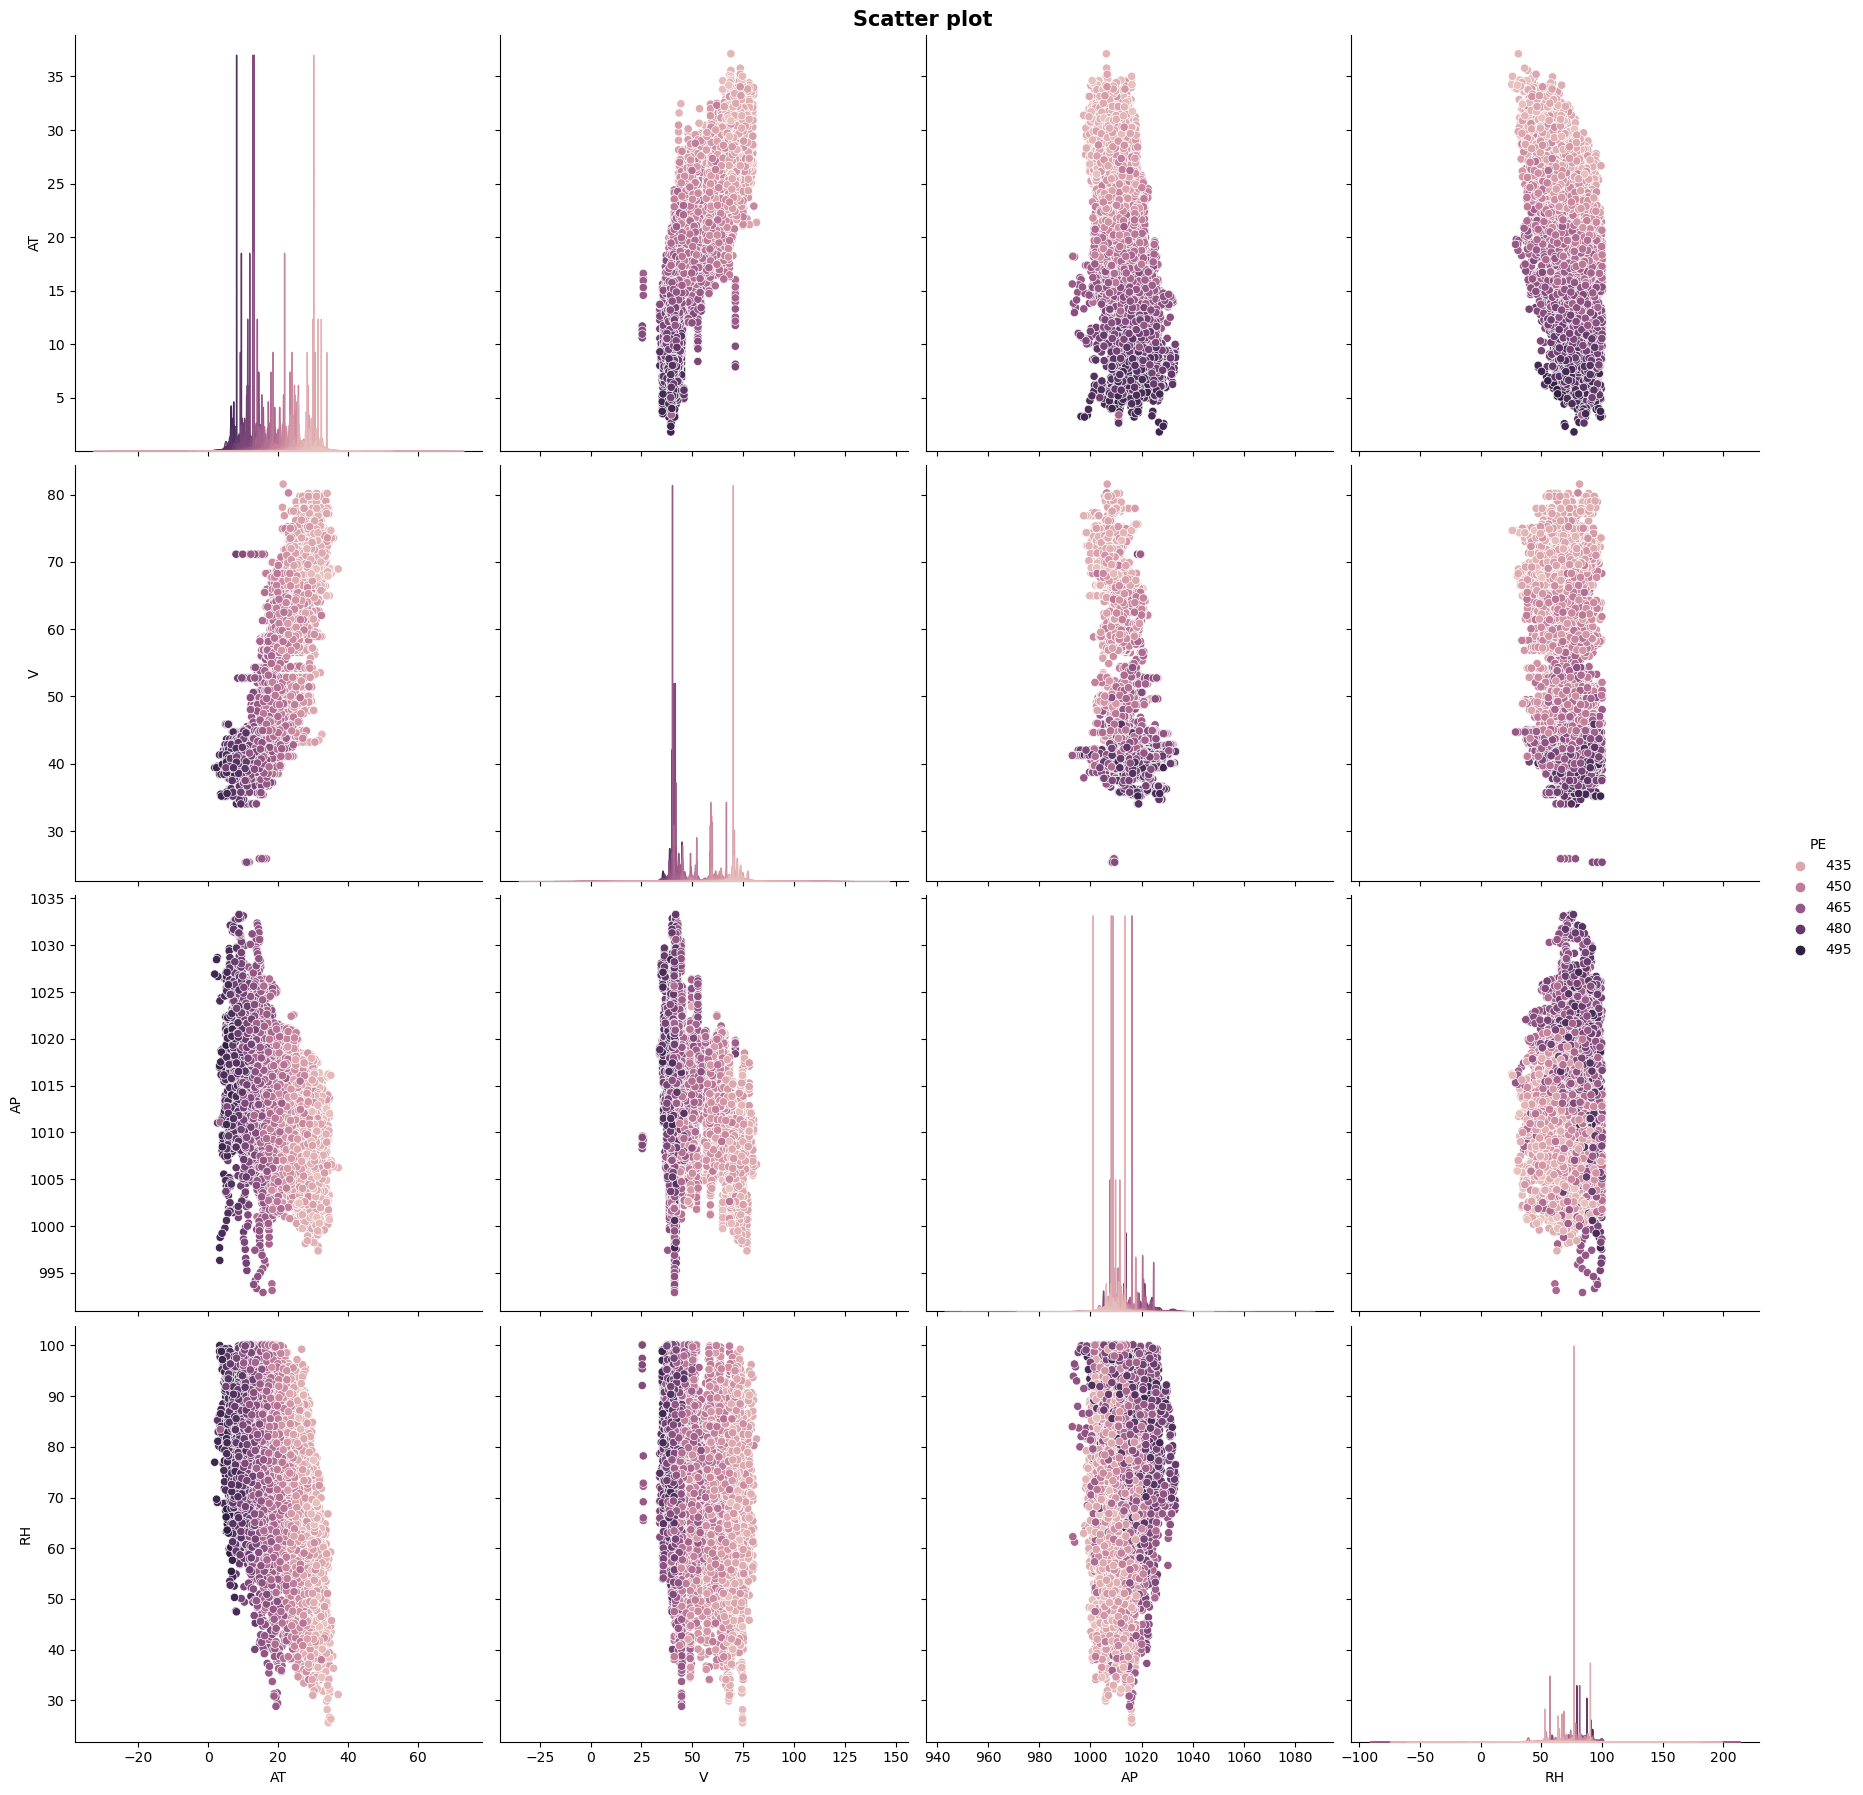

In [4]:
df_plt=sns.pairplot(df,hue = 'PE', kind='scatter',height = 4.5)
df_plt.fig.suptitle('Scatter plot', y=1,fontsize=15,weight='bold')
plt.show()

#Write observations

#### OBSERVATIONS:
1. PE(Energy output) is negatively correlated with AT(Ambient Temperature) and V(Exhaust Vacuum)
2. V(Exhaust Vacuum) and AT(Ambient Temperature) have high variance
3. AT and V are positivly correlated
4. AP(Ambient Pressure) have normal distribution; RH(Relative Humidity) and PE(Energy output) have skewed distribution

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [6]:
df_des=df.describe()
df_des.loc['range']=df_des.loc['max']-df_des.loc['min']
df_des.loc['inter_quartile_range'] =df_des.loc['75%'] - df_des.loc['25%']
print(tabulate(df_des, headers = 'keys', tablefmt = 'github'))

|                      |         AT |         V |         AP |        RH |       PE |
|----------------------|------------|-----------|------------|-----------|----------|
| count                | 9568       | 9568      | 9568       | 9568      | 9568     |
| mean                 |   19.6512  |   54.3058 | 1013.26    |   73.309  |  454.365 |
| std                  |    7.45247 |   12.7079 |    5.93878 |   14.6003 |   17.067 |
| min                  |    1.81    |   25.36   |  992.89    |   25.56   |  420.26  |
| 25%                  |   13.51    |   41.74   | 1009.1     |   63.3275 |  439.75  |
| 50%                  |   20.345   |   52.08   | 1012.94    |   74.975  |  451.55  |
| 75%                  |   25.72    |   66.54   | 1017.26    |   84.83   |  468.43  |
| max                  |   37.11    |   81.56   | 1033.3     |  100.16   |  495.76  |
| range                |   35.3     |   56.2    |   40.41    |   74.6    |   75.5   |
| inter_quartile_range |   12.21    |   24.8    |    8

### (c) Simple Linear Regression

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:04:38   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

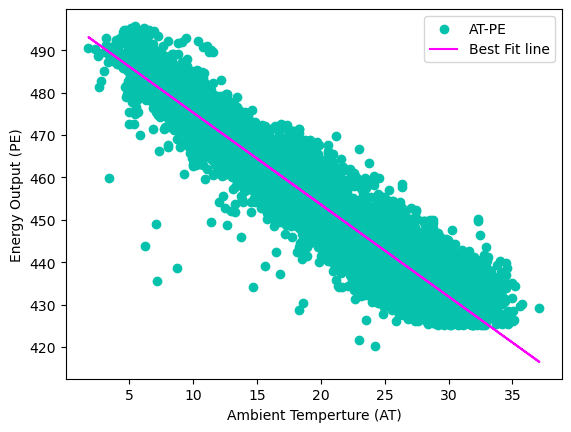

In [9]:
# Using ordinary least square method of linear regression(statistic model api)
lr_at = smf.ols(formula='PE~AT', data=df) #formula is prediect PE(independent variable using AT(dep variable))
fit_model_at = lr_at.fit()
print(fit_model_at.summary())
pred_at = fit_model_at.predict(df)
plt.scatter(df['AT'],df['PE'], color = '#06C2AC',label = 'AT-PE')
plt.plot(df['AT'],pred_at, color = '#FF00FF',label='Best Fit line')
plt.xlabel('Ambient Temperture (AT)')
plt.ylabel('Energy Output (PE)')    
plt.legend(loc='best')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:04:38   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

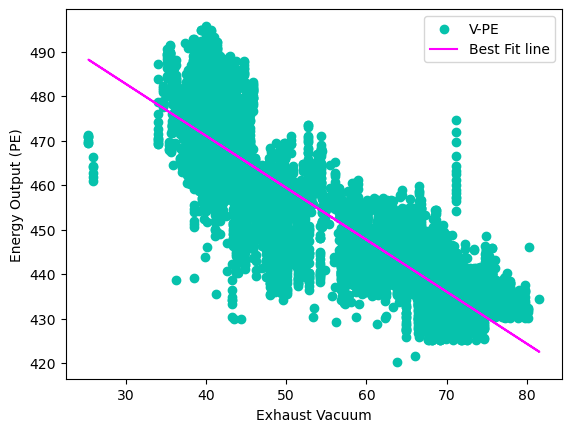

In [10]:
lr_v = smf.ols(formula='PE~V', data=df)
fit_model_v = lr_v.fit()
print(fit_model_v.summary())
pred_v = fit_model_v.predict(df)
plt.scatter(df['V'],df['PE'], color = '#06C2AC',label = 'V-PE')
plt.plot(df['V'],pred_v, color = '#FF00FF',label='Best Fit line')
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Energy Output (PE)')    
plt.legend(loc='best')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:04:39   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

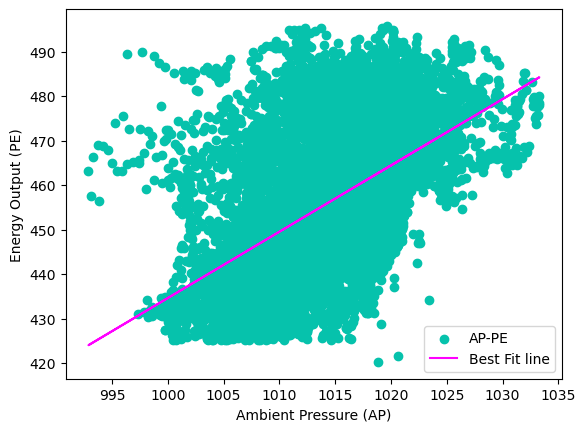

In [11]:
lr_ap = smf.ols(formula='PE~AP', data=df)
fit_model_ap = lr_ap.fit()
print(fit_model_ap.summary())
pred_ap = fit_model_ap.predict(df)
plt.scatter(df['AP'],df['PE'], color = '#06C2AC',label = 'AP-PE')##FFF68F
plt.plot(df['AP'],pred_ap, color = '#FF00FF',label='Best Fit line')
plt.xlabel('Ambient Pressure (AP)')
plt.ylabel('Energy Output (PE)')    
plt.legend(loc='best')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:04:40   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

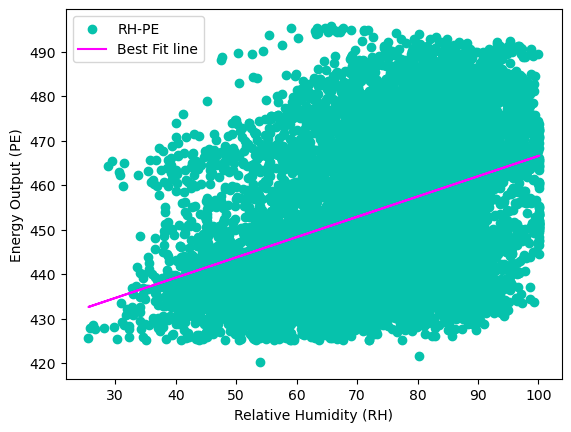

In [12]:
lr_rh = smf.ols(formula='PE~RH', data=df)
fit_model_rh = lr_rh.fit()
print(fit_model_rh.summary())
pred_rh = fit_model_rh.predict(df)
plt.scatter(df['RH'],df['PE'], color = '#06C2AC',label = 'RH-PE')
plt.plot(df['RH'],pred_rh, color = '#FF00FF',label='Best Fit line')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Energy Output (PE)')    
plt.legend(loc='best')

#### RESULTS/OBSERVATIONS :
As observed in above OLS model summary for simple linear regression, every predictor have p-value less than 0.05, which indicate that every predictor [AT,V,AP,RH] have significant association w.r.t to dependent variable [PE]

## Outliers 

In [13]:
#Tukey method for outliers
for i in df.columns:
    print("\nDetecting Outlier in {}".format(i))
    lb = df_des[i]['25%'] - 1.5*df_des[i]['inter_quartile_range']
    ub = df_des[i]['75%'] + 1.5*df_des[i]['inter_quartile_range']
    df_n = df[(df[i]<lb) | (df[i]>ub)]
    print("Number of outliers:",len(df_n))
    
#write observation


Detecting Outlier in AT
Number of outliers: 0

Detecting Outlier in V
Number of outliers: 0

Detecting Outlier in AP
Number of outliers: 88

Detecting Outlier in RH
Number of outliers: 12

Detecting Outlier in PE
Number of outliers: 0


In [14]:
def univariate_model(x, y, X, column):
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model

def count_outlier_indices(model):
    THRESHOLD = 4 / len(df)
    influence = model.get_influence()
    cooks = influence.cooks_distance
    outliers_index = np.where(cooks[0] > THRESHOLD)
    return outliers_index

coeff = {}
def model_summary(column):
    if (column != "PE"):
        y = df["PE"].to_numpy()
        x = df[column].to_numpy()
        X = sm.add_constant(x, prepend=False)
        model = univariate_model(x, y, X, column)
        outlier_indices = count_outlier_indices(model)
        coeff[column] = model.params
        fig, axes = plt.subplots(figsize=(6, 4))
        with plt.style.context('ggplot'):
            axes.scatter(x, y, alpha=0.3, label="observations", color = '#06C2AC')
            axes.scatter(x[outlier_indices], y[outlier_indices], marker="+", label="Outliers")
            axes.plot(x, model.predict(X), "tab:red", label="Regression Line")
        axes.set_title(f"Simple Linear Regression for {column}")
        axes.set_xlabel(column)
        axes.set_ylabel("PE")
        axes.legend()
        plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:04:43   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.1713      0.007   -291.715      0.0

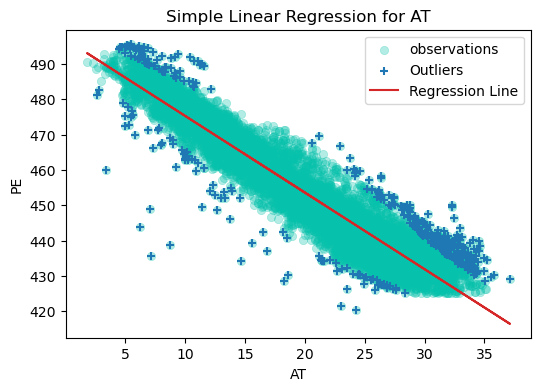

In [15]:
model_summary("AT")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:04:44   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1681      0.007   -172.402      0.0

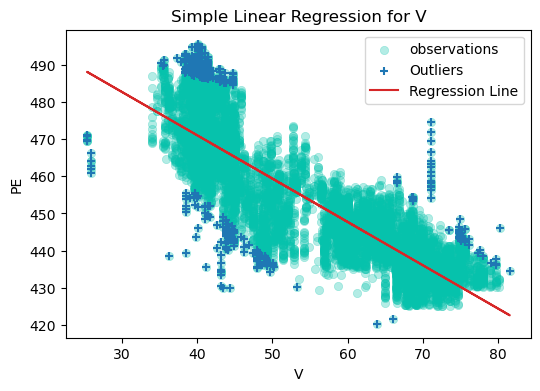

In [16]:
model_summary("V")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:04:44   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4899      0.025     59.296      0.0

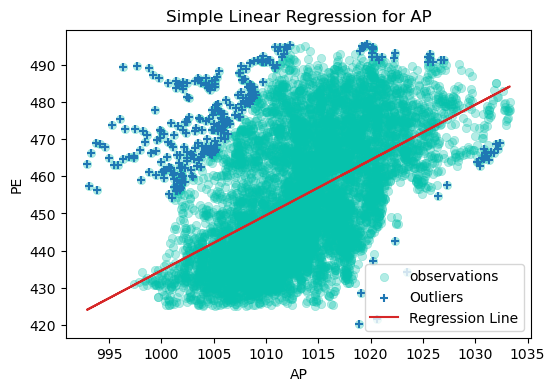

In [17]:
model_summary("AP")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:04:45   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4557      0.011     41.399      0.0

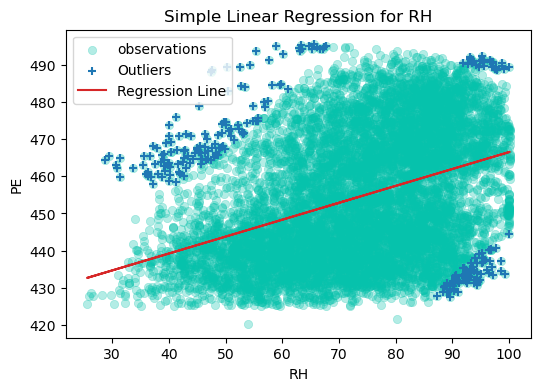

In [18]:
model_summary("RH")

#### OBSERVATION regarding Outliers:
From the above outliers calculation using Tukey method and also plots we come to a conclusion that there are Outliers present in the dataset and they should be handled properly. So to sum up, there are 88 outliers in AP and 12 outliers in RH

### (d) Multiple Regression

In [19]:
Mul_Reg = smf.ols('PE~AT+V+AP+RH',df).fit()
pred_mulreg = Mul_Reg.predict(df)
print(Mul_Reg.summary())

#write observations

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:04:46   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

#### OBSERVATIONS: Rejecting Null Hypothesis:> H0 : βj = 0
#### We can reject the Null Hypothesis for all variables because each variable has a coefficient value that can influence the regression results, and the p value for all of the variables is less than.05 (p<0.05)

### (e) 1c Compare to 1d

In [20]:
df_cmp = pd.DataFrame()
df_cmp['AT'] = [fit_model_at.params[1], Mul_Reg.params[1]]
df_cmp['V'] = [fit_model_v.params[1], Mul_Reg.params[2]]
df_cmp['AP'] = [fit_model_ap.params[1],Mul_Reg.params[3]]
df_cmp['RH'] = [fit_model_rh.params[1],Mul_Reg.params[4]]
df_cmp

,AT,V,AP,RH
0,-2.171320,-1.168135,1.489872,0.455650
1,-1.977513,-0.233916,0.062083,-0.158054


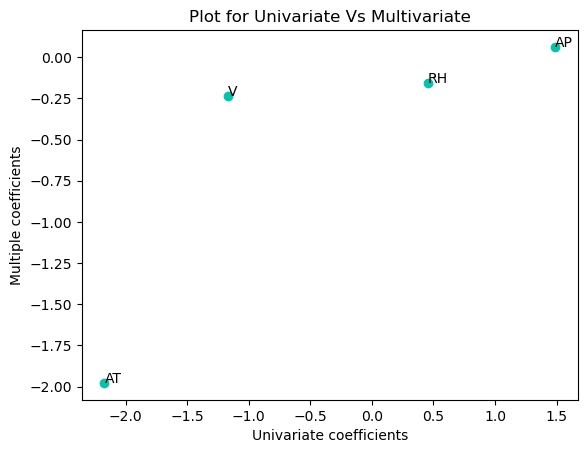

In [22]:
plt.scatter(df_cmp.loc[0],df_cmp.loc[1], color='#06C2AC')
plt.xlabel('Univariate coefficients')
plt.ylabel('Multiple coefficients')
plt.title('Plot for Univariate Vs Multivariate')
for i in df_cmp.columns:
    plt.annotate(i,(df_cmp[i][0],df_cmp[i][1]))

### (f) Nonlinear Association

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:31:15   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.3641      0.336    732.248      0.0

Text(0, 0.5, 'Energy Output (PE)')

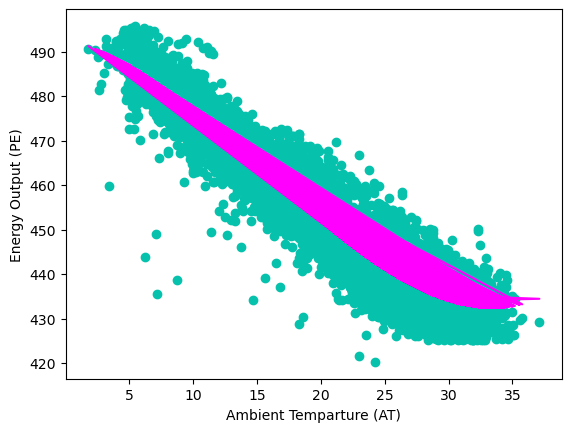

In [19]:
df_at = pd.DataFrame(df['AT'])
poly = PolynomialFeatures(degree=3)
ploy_at = poly.fit_transform(df_at)

polyReg_at = smf.ols('PE~ploy_at',df).fit()
print(polyReg_at.summary())
pred_pr_at = polyReg_at.predict(df)

plt.scatter(df['AT'],df['PE'], color = '#06C2AC')
plt.plot(df['AT'], pred_pr_at, color='#FF00FF')
plt.xlabel('Ambient Temparture (AT)')
plt.ylabel('Energy Output (PE)')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:31:18   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    277.0734      4.575     60.557      0.0

Text(0, 0.5, 'Energy Output (PE)')

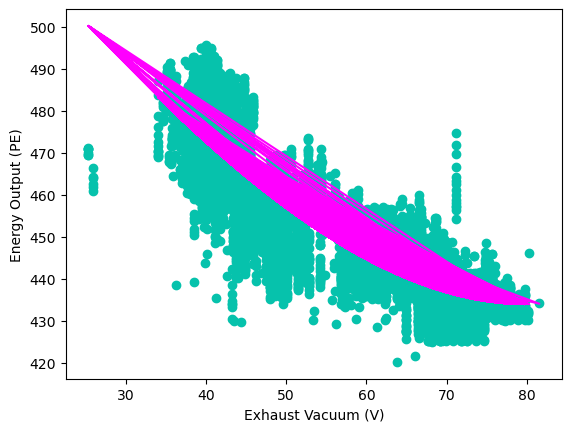

In [20]:
df_v = pd.DataFrame(df['V'])
poly = PolynomialFeatures(degree=3)
ploy_v = poly.fit_transform(df_v)

polyReg_v = smf.ols('PE~ploy_v',df).fit()
print(polyReg_v.summary())
pred_pr_v = polyReg_v.predict(df)

plt.scatter(df['V'],df['PE'], color = '#06C2AC')
plt.plot(df['V'], pred_pr_v, color='#FF00FF')
plt.xlabel('Exhaust Vacuum (V)')
plt.ylabel('Energy Output (PE)')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:31:21   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    234.2068      5.272     44.422      0.0

Text(0, 0.5, 'Energy Output (PE)')

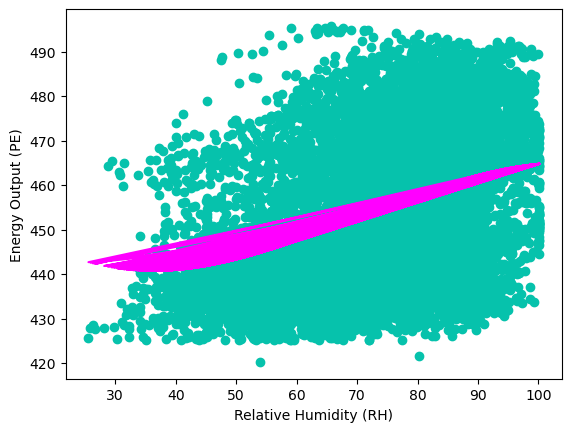

In [21]:
df_rh = pd.DataFrame(df['RH'])
poly = PolynomialFeatures(degree=3)
ploy_rh = poly.fit_transform(df_rh)

polyReg_rh = smf.ols('PE~ploy_rh',df).fit()
print(polyReg_rh.summary())
pred_pr_rh = polyReg_rh.predict(df)

plt.scatter(df['RH'],df['PE'], color = '#06C2AC')
plt.plot(df['RH'], pred_pr_rh, color='#FF00FF')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Energy Output (PE)')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:31:24   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

Text(0, 0.5, 'Energy Output (PE)')

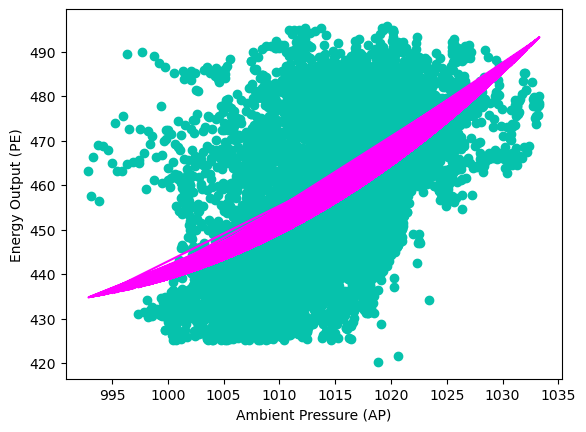

In [22]:
df_ap = pd.DataFrame(df['AP'])
poly = PolynomialFeatures(degree=3)
ploy_ap = poly.fit_transform(df_ap)

polyReg_ap = smf.ols('PE~ploy_ap',df).fit()
pred_pr_ap = polyReg_ap.predict(df)
print(polyReg_ap.summary())

plt.scatter(df['AP'],df['PE'], color = '#06C2AC')
plt.plot(df['AP'], pred_pr_ap, color='#FF00FF')
plt.xlabel('Ambient Pressure (AP)')
plt.ylabel('Energy Output (PE)')

#Write observation

#### OBSERVATION: Yes, It could be observed that there is a nonlinear association between any of the predictors and the response. Except for V, all of the p values are near to zero. In V, cubic functions have p values larger than 0.05*

### (g) Interactions of Predictors

In [23]:
linear_model = smf.ols('PE~AT+V+AP+RH + AT*V +AT*AP +AT*RH + V*AP +V*RH +AP*RH',df).fit()
pred_lm = linear_model.predict(df)
print(linear_model.summary())

#write observation
# 1. Significant 
# 2. Insignificant

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:10:05   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

#### OBSERVATIONS: Yes, there is an evidence of association of interactions of predictors with the response. The interaction terms=> 'AT:V', 'AT:RH', 'AP:RH' and 'V:AP' are statistically significant, because, thier p value came below 0.05

### (h) Improvement

In [24]:
train_data,test_data = train_test_split(df,train_size=0.7,random_state=0)

x_data=df.loc[:,['AT', 'V', 'AP', 'RH']]
y_data=df['PE']
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,train_size=0.7,random_state=0)

lmh  = smf.ols("PE ~ AT + V + AP + RH",train_data).fit()
pred_train = lmh.predict(train_data)
pred_test = lmh.predict(test_data)

mul_test_mse = mean_squared_error(y_test, pred_test)
print('Training Mean Sqaure Error is {}'.format(mean_squared_error(y_train,pred_train)))
print('Testing Mean Sqaure Error is {}'.format(mean_squared_error(y_test, pred_test)))

Training Mean Sqaure Error is 20.941563616739593
Testing Mean Sqaure Error is 20.36838300288592


In [25]:
multi_model = smf.ols('PE ~ AT + V + AP + RH + AT*V +AT*AP +AT*RH + V*AP +V*RH +AP*RH+ I(V**2) + I(AT**2) + I(AP**2) + I(RH**2)',train_data).fit()
print(multi_model.summary())
pred_multi_model = multi_model.predict(test_data)
pred_multi_model_train = multi_model.predict(train_data)

mul_test_mse_itn = mean_squared_error(y_test, pred_multi_model)
print('Training Mean Sqaure Error is {}'.format(mean_squared_error(y_train, pred_multi_model_train)))
print('Testing Mean Sqaure Error is {}'.format(mean_squared_error(y_test, pred_multi_model)))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:10:08   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7073.1567   1505.522     -4.698      0.0

### After Eliminating the values

In [26]:
multi_model2 = smf.ols('PE ~ AT + V + AP + RH + AT*V + AP*RH+ AT*RH + I(AT**2) + I(AP**2) + I(RH**2)',train_data).fit()
pred_lmh_modified = multi_model2.predict(test_data)
pred_lmh_modified_train = multi_model2.predict(train_data)

mul_test_mse_itn = mean_squared_error(y_test, pred_lmh_modified)
print(multi_model2.summary())
print('Training Mean Sqaure Error is {}'.format(mean_squared_error(y_train, pred_lmh_modified_train)))
print('Testing Mean Sqaure Error is {}'.format(mean_squared_error(y_test, pred_lmh_modified)))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9892.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:10:44   Log-Likelihood:                -19255.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6686   BIC:                         3.861e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.001e+04   1121.577     -8.921      0.0

### (i) KNN

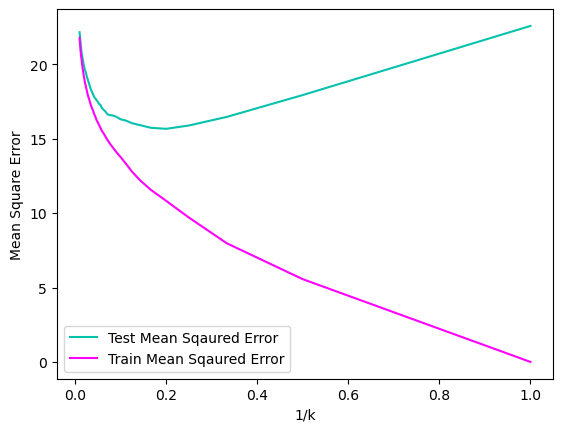

In [27]:
ftest= []
ftrain= [] 
for k in range(1,101,1):
    test=[]
    train=[]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train) 
    predts = knn.predict(x_test)
    mse_test = (mean_squared_error(y_test,predts)) 
    test.append(k)
    test.append(mse_test)
    predtr = knn.predict(x_train)
    mse_train=(mean_squared_error(y_train,predtr)) 
    train.append(k)
    train.append(mse_train)
    ftest.append(test)
    ftrain.append(train)

k=[]
for i in range(1,101,1):
    k.append(1/i)
    
testp=[i[1] for i in ftest]
trainp=[i[1] for i in ftrain]

plt.plot(k,testp,label='Test Mean Sqaured Error', color = '#06C2AC')
plt.plot(k,trainp,label='Train Mean Sqaured Error', color = '#FF00FF')
plt.ylabel('Mean Square Error')
plt.xlabel('1/k')
plt.legend()

In [28]:
kleast = 0
c = 9999999999
for i in ftest:
    if i[1] < c:
        c = i[1]
        kleast = i[0]
print('Best K value for KNN Regression is',kleast,'and its MSE is',c)

Best K value for KNN Regression is 5 and its MSE is 15.6635051689307


### Normalized Data

In [29]:
mmscaler = MinMaxScaler()
x_train_nor = mmscaler.fit_transform(x_train)
x_test_nor = mmscaler.fit_transform(x_test)
X_train=pd.DataFrame(x_train_nor)
X_test=pd.DataFrame(x_test_nor)

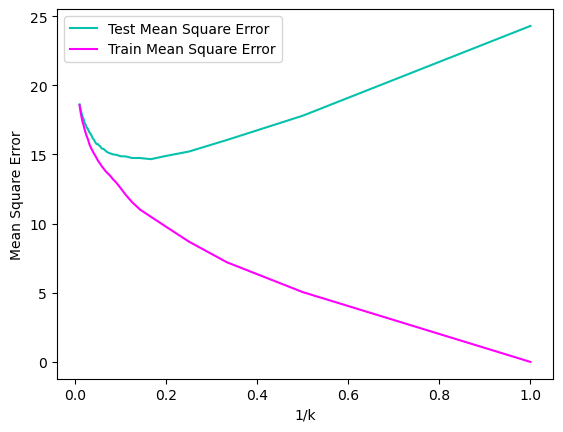

In [30]:
ftest_n= []
ftrain_n= [] 
for m in range(1,101,1):
    test_n = []
    train_n = []
    knn_2 = KNeighborsRegressor(n_neighbors = m)
    knn_2.fit(X_train, y_train) 
    predtsn = knn_2.predict(X_test)
    mse_test_n = (mean_squared_error(y_test,predtsn)) 
    test_n.append(m)
    test_n.append(mse_test_n)
    predtrn = knn_2.predict(X_train)
    mse_train_n = (mean_squared_error(y_train,predtrn)) 
    train_n.append(m)
    train_n.append(mse_train_n)
    ftest_n.append(test_n)
    ftrain_n.append(train_n)
    
k_n=[1/p for p in range(1,101,1)]

testp_n=[i[1] for i in ftest_n]
trainp_n=[i[1] for i in ftrain_n]

plt.plot(k_n,testp_n,label='Test Mean Square Error', color = '#06C2AC')
plt.plot(k_n,trainp_n,label='Train Mean Square Error', color = '#FF00FF')
plt.ylabel('Mean Square Error')
plt.xlabel('1/k')
plt.legend()

In [31]:
kleastn = 0
cn = 9999999999
for i in ftest_n:
    if i[1] < cn:
        cn = i[1]
        kleastn = i[0]
print('Best K value for KNN Regression is',kleastn,'and its MSE is',cn)

Best K value for KNN Regression is 6 and its MSE is 14.659682056194127


### (j ) Compare KNN and Linear

In [32]:
column= ["Model","Test MSE"]
table= [["Multiple Linear Regression",mul_test_mse],["Multiple Linear Regression (Interaction term,nonlinear term)" , mul_test_mse_itn],["KNN with normalized data", cn],["KNN regression without Normalized data",c]]
print(tabulate(table, headers=column, tablefmt="github"))

| Model                                                        |   Test MSE |
|--------------------------------------------------------------|------------|
| Multiple Linear Regression                                   |    20.3684 |
| Multiple Linear Regression (Interaction term,nonlinear term) |    17.5657 |
| KNN with normalized data                                     |    14.6597 |
| KNN regression without Normalized data                       |    15.6635 |


#### OBSERVATION: It can be said from the above table that KNN (after normlization) performs better than Multiple Linear Regression.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

When sample size is large and number of predictors is small, that means there is less chances of model to get overfit. Also, lower dimentionality will help model to learn complex patterns in data. This is Highly Flexible model will lead to good performace.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

Number of p is high will result in high dimentionality and small number of oberservation will lead to overfitting issue, mostly model will have less bias and high variance, tradeoff between bias and variance will get disturbed. Flexible method will perform worse leading to overfitting.

### (c) The relationship between the predictors and response is highly non-linear.

Inflexible model will perform worse in this case. This case need flexible model for better performance.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

High varaince means more depersion in data, that indicate high noise. This will lead to overfitting. So, flexible model will perform worse in this case.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [27]:
data = pd.DataFrame({
    'X1': [0, 2, 0, 0, -1, 1],
    'X2': [3, 0, 1, 1, 0, 1],
    'X3': [0, 0, 3, 2, 1, 1]
})

test_point = np.array([0, 0, 0])
data['Euclidean Distance'] = np.linalg.norm(data[['X1', 'X2', 'X3']].values - test_point, axis=1)
print(data)

   X1  X2  X3  Euclidean Distance
0   0   3   0            3.000000
1   2   0   0            2.000000
2   0   1   3            3.162278
3   0   1   2            2.236068
4  -1   0   1            1.414214
5   1   1   1            1.732051


### (b) What is our prediction with K = 1? Why?

In [28]:
data = pd.DataFrame({
    'X1': [0, 2, 0, 0, -1, 1],
    'X2': [3, 0, 1, 1, 0, 1],
    'X3': [0, 0, 3, 2, 1, 1],
    'Y': ['Square', 'Square', 'Square', 'Circle', 'Circle', 'Square']
})

testData = np.array([0, 0, 0])
data['Euclidean Distance'] = np.linalg.norm(data[['X1', 'X2', 'X3']].values - testData, axis=1)
index = data['Euclidean Distance'].idxmin()
knnclass = data.loc[index, 'Y']

predvalue = knnclass

print("Prediction with K = 1 is {}".format(predvalue))


Prediction with K = 1 is Circle


Since, the nearest neighbor to Z is observation 5 (with Y=Green) at a Euclidian distance of 1.414

### (c) What is our prediction with K = 3? Why?

The nearest 3 neighbor to Z is Observation 5 (ED = 1.414, Y= Green), Observation 6 (ED = 1.73, Y= Red) and Observation 2 (ED = 2, Y= Red). Since there are 2 Red then our output will be Red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

k value have inverse proportionality relation with bayesian decision boundry flexibility. When k value increases bayes decision boindary becomes rigid. So, for highly nonlinear model, k value should be small.